In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm


# Importar los datos de precios de la acción
df = pd.read_csv("C:/Users/Rayzek/Documents/PROYECTOS/DATASETS/ACCIONES/AMZN.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


DataFrame Head:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,4.07500,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04,4.26875,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05,3.52500,3.756250,3.400000,3.487500,3.487500,769148000


DataFrame Tail:


,Date,Open,High,Low,Close,Adj Close,Volume
5784,2022-12-28,82.800003,83.480003,81.690002,81.82,81.82,58228600
5785,2022-12-29,82.870003,84.550003,82.550003,84.18,84.18,54995900
5786,2022-12-30,83.120003,84.050003,82.470001,84.00,84.00,62330000


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(5787, 7)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5787 non-null   object 
 1   Open       5787 non-null   float64
 2   High       5787 non-null   float64
 3   Low        5787 non-null   float64
 4   Close      5787 non-null   float64
 5   Adj Close  5787 non-null   float64
 6   Volume     5787 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.6+ KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Open,5787,34.32,9.289,49.46,0.295,2.196,9.289,44.388,187.2,1.595575,1.308627
High,5787,34.723,9.422,50.036,0.305,2.241,9.422,44.712,188.654,1.595641,1.303388
Low,5787,33.873,9.18,48.811,0.276,2.166,9.18,44.248,184.839,1.595577,1.314103
Close,5787,34.303,9.294,49.417,0.298,2.2,9.294,44.451,186.57,1.594712,1.305291
Adj Close,5787,34.303,9.294,49.417,0.298,2.2,9.294,44.451,186.57,1.594712,1.305291
Volume,5787,124453370.157,102146000,99400449.969,17626000,68337000,102146000,148233000,2086584000,5.525969,59.096855


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



c:\Users\Rayzek\AppData\Local\Programs\Python\Python311\Lib\site-packages\fasteda\__init__.py:124: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.3f')


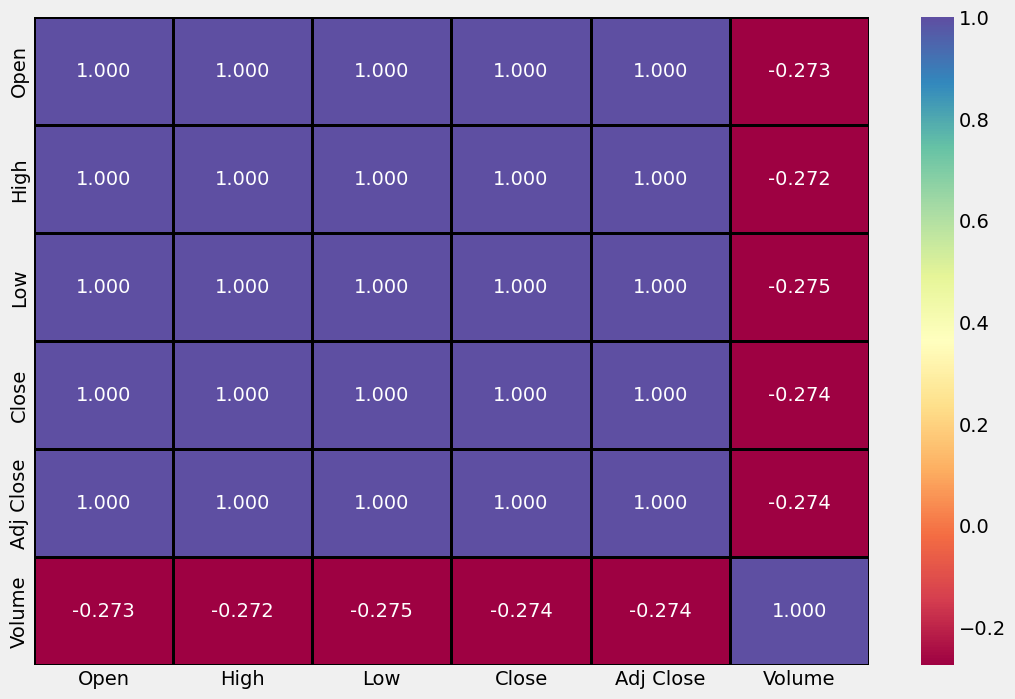

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



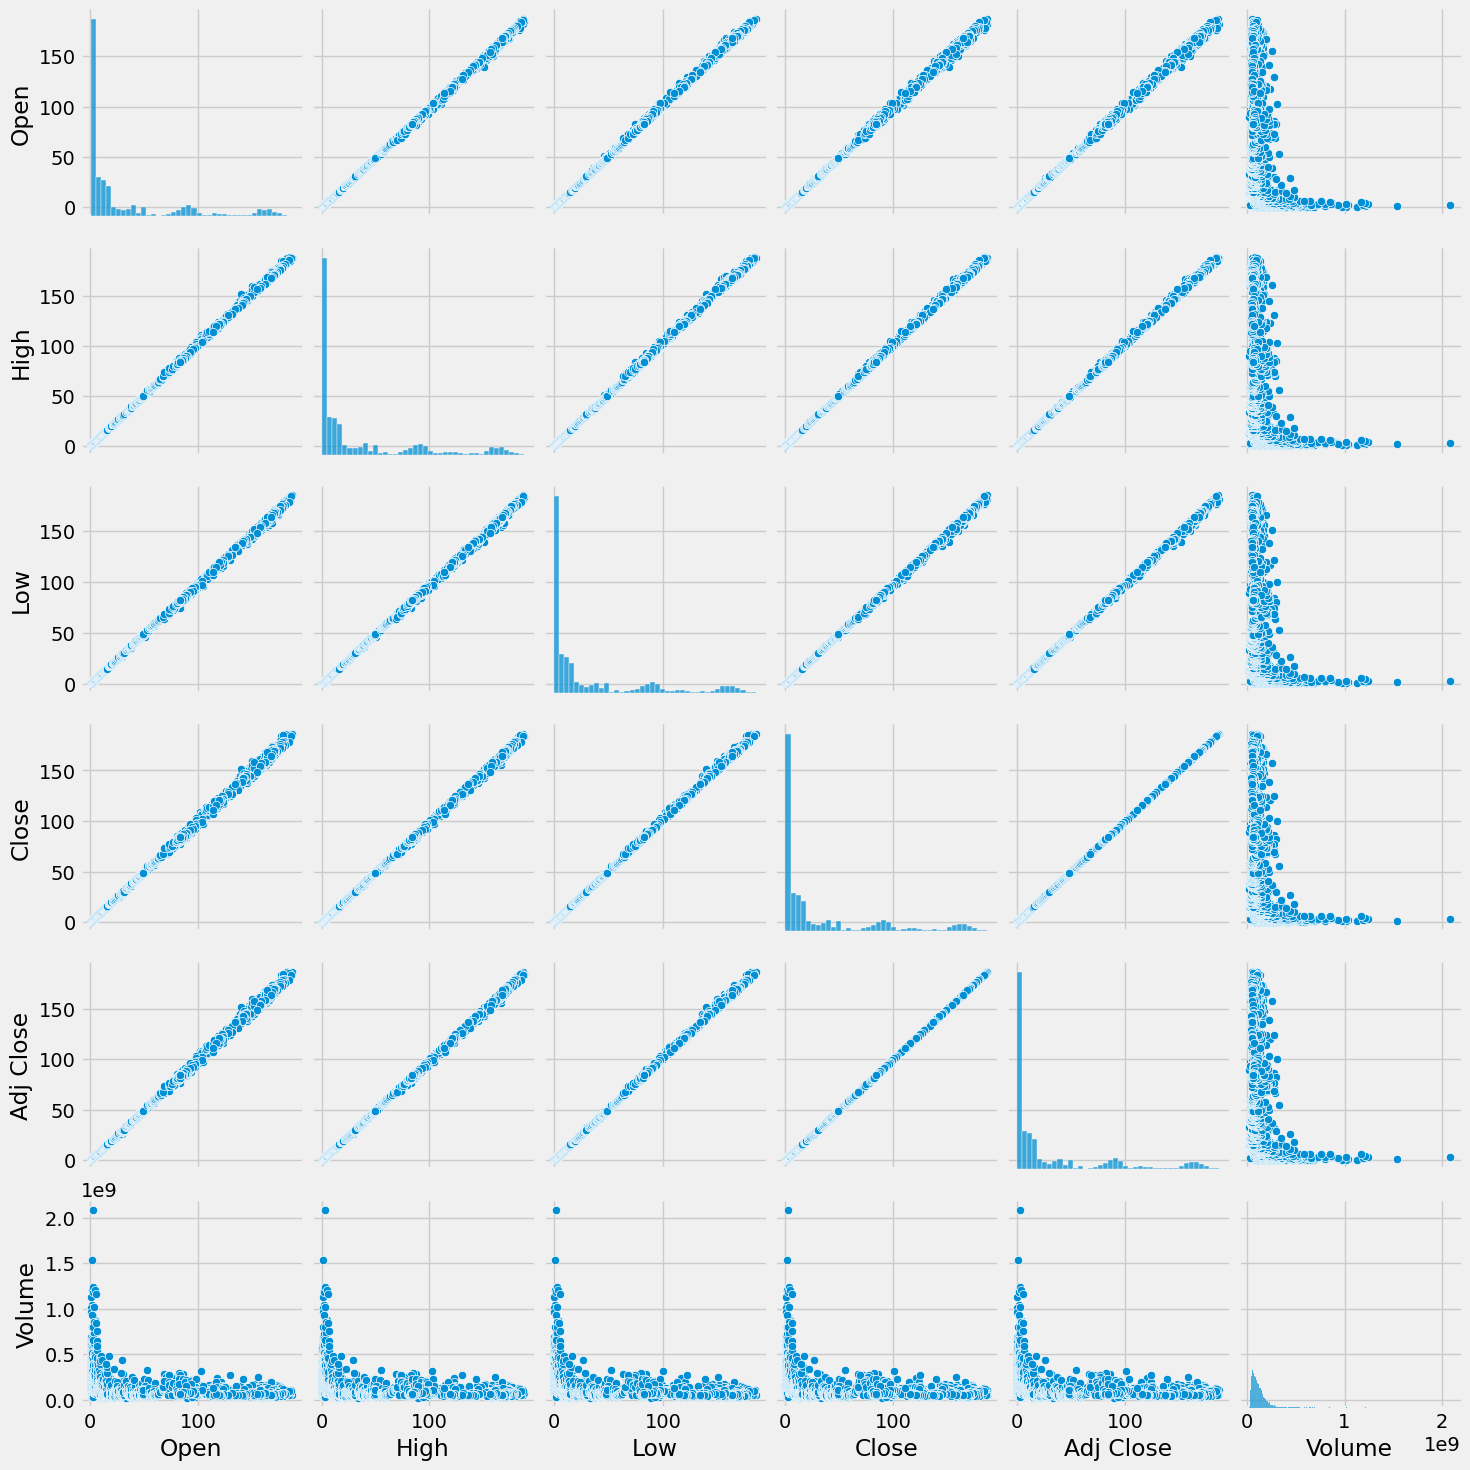

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



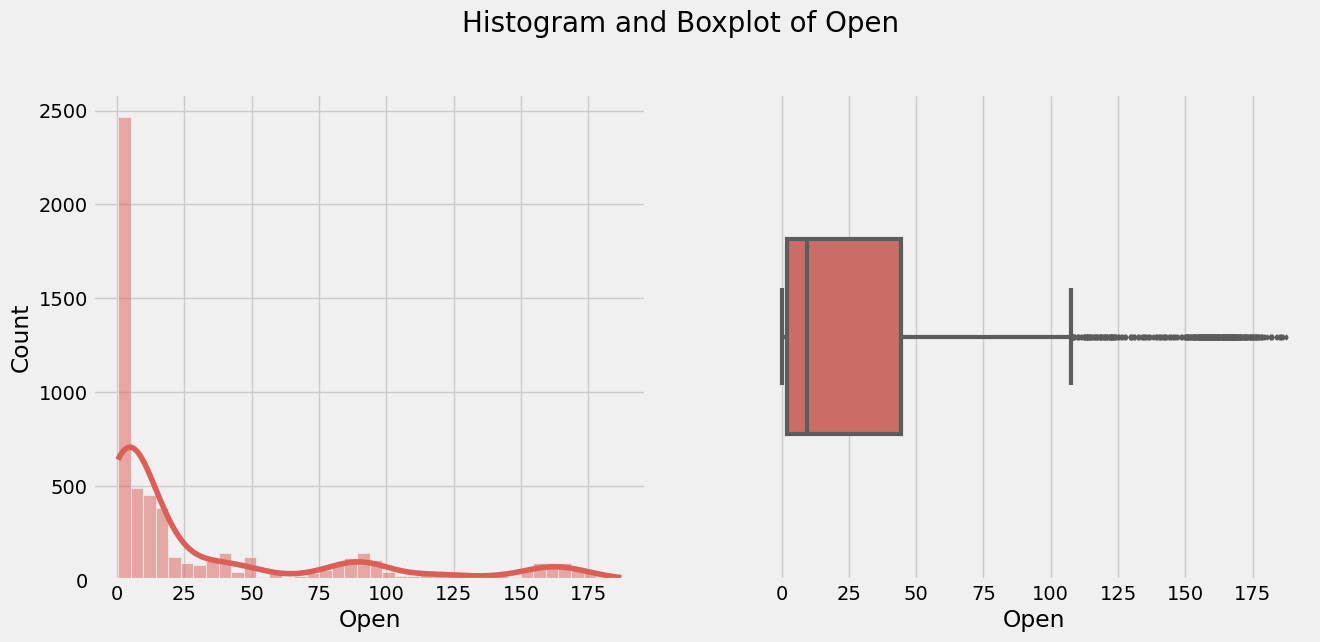

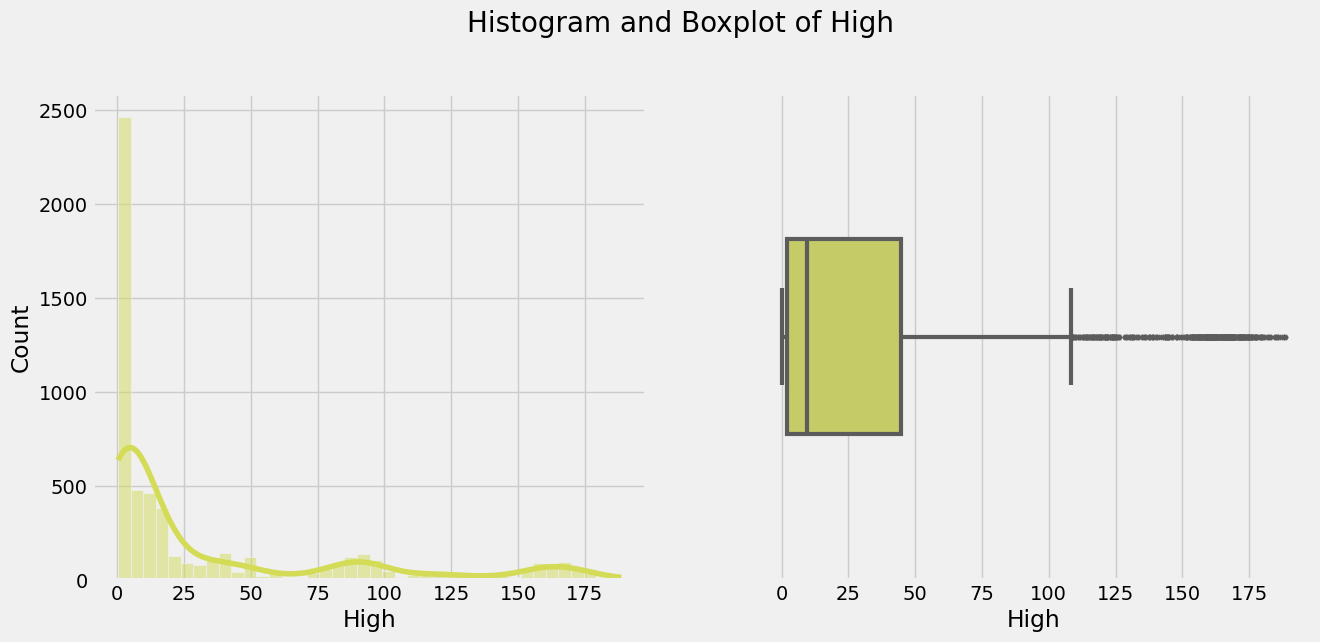

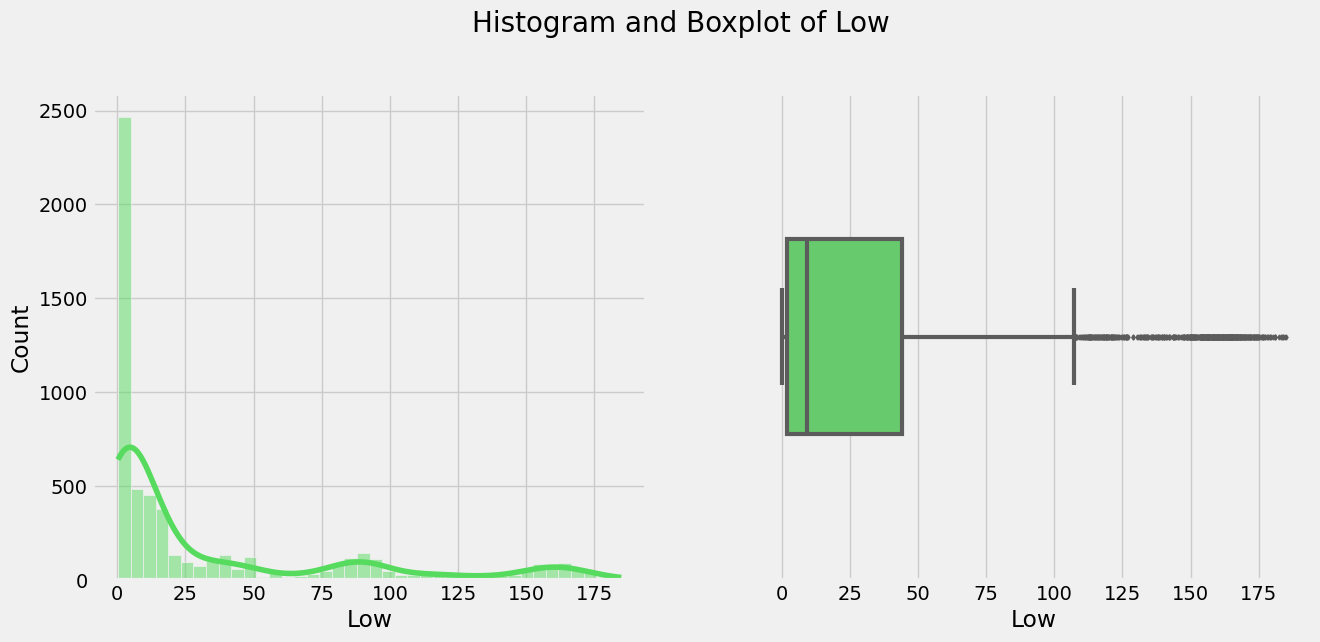

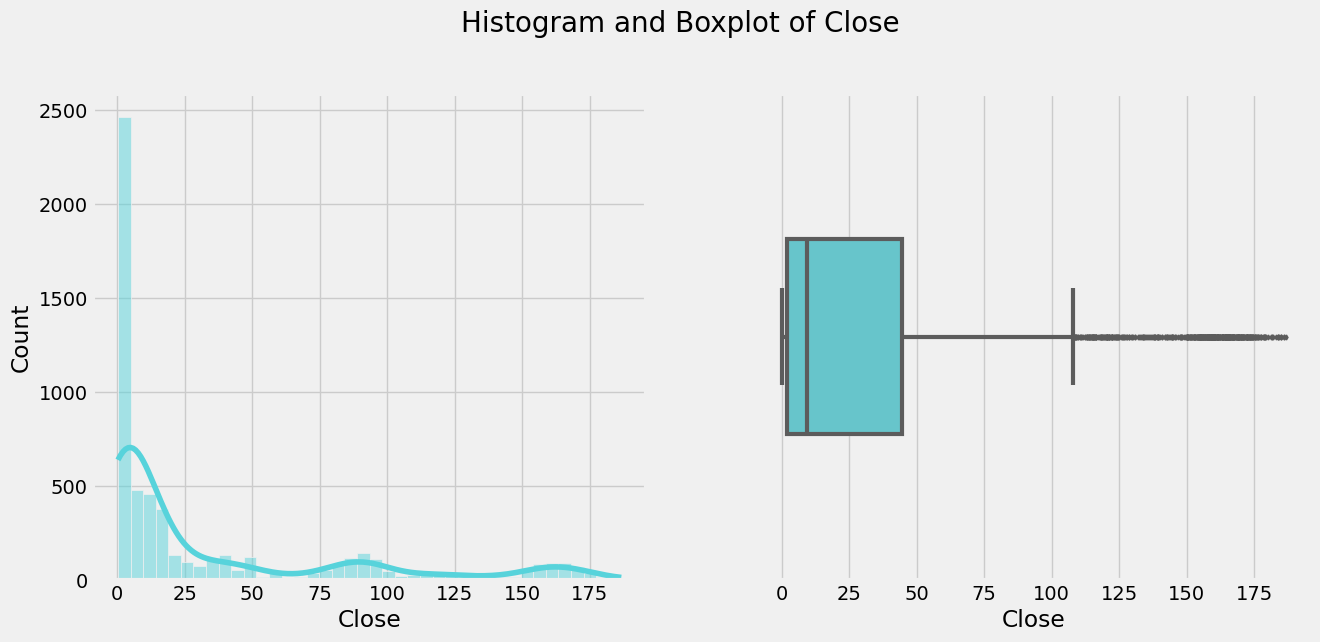

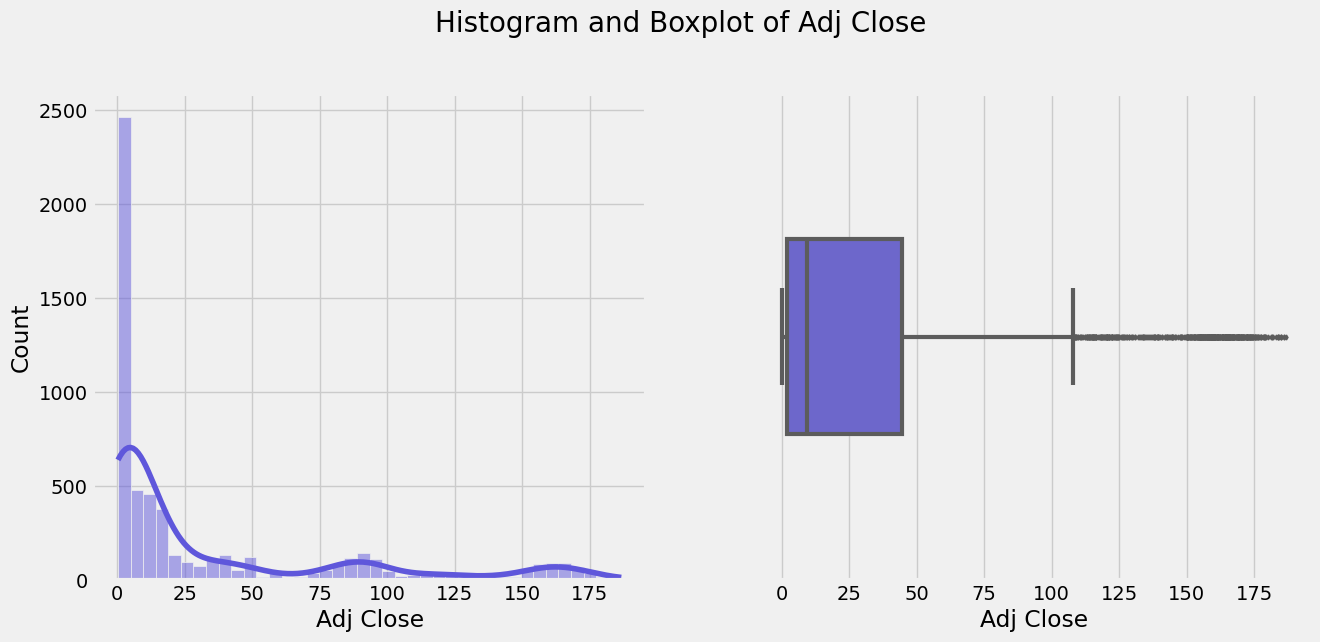

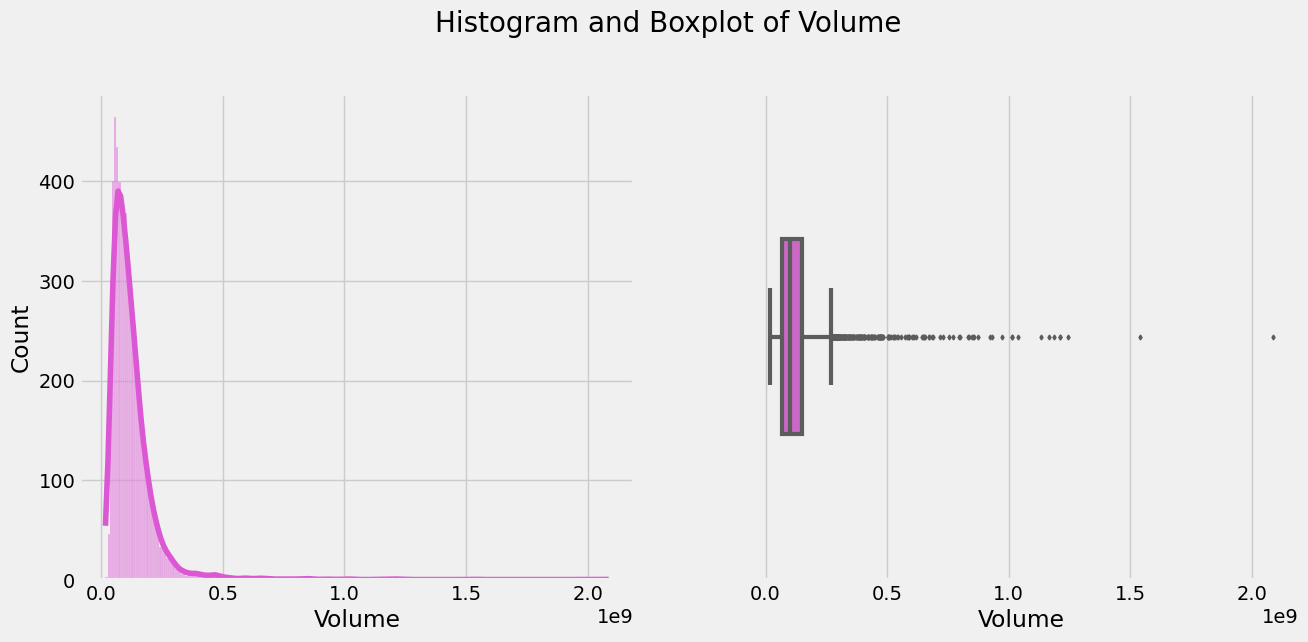

In [7]:
from fasteda import fast_eda

a=fast_eda(df, target=None, correlation=True, pairplot=True, hist_box_plot=True, countplot=True)

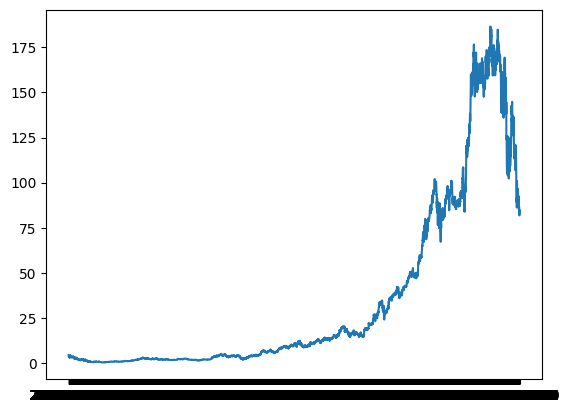

In [24]:
# LINEAS
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,4))
plt.plot(df['Date'], df['Close'])
plt.show()

In [39]:
# Set date as the index of the DataFrame
df=df.set_index('Date')

# Select only data from dates before the quarantine period
start_date = '2000-01-03'
end_date = '2020-03-22'
df = df.loc[start_date:end_date]
df=df.reset_index()

In [40]:
import seaborn as sns
# Seleccionar las características que se utilizarán para predecir el precio
# Convertir la columna de fecha a variables dummies
df_dummies = pd.get_dummies(df['Date'])

# Unir la matriz de variables dummies con los datos originales
df = pd.concat([df, df_dummies], axis=1)
df



,Date,Open,High,Low,Close,Adj Close,Volume,2000-01-03,2000-01-04,2000-01-05,...,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20
0,2000-01-03,4.075000,4.478125,3.952344,4.468750,4.468750,322352000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000-01-04,4.268750,4.575000,4.087500,4.096875,4.096875,349748000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2000-01-05,3.525000,3.756250,3.400000,3.487500,3.487500,769148000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2000-01-06,3.565625,3.634375,3.200000,3.278125,3.278125,375040000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000-01-07,3.350000,3.525000,3.309375,3.478125,3.478125,210108000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,2020-03-16,82.075500,87.972504,81.301498,84.457497,84.457497,178346000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5082,2020-03-17,88.773499,92.889000,84.461998,90.391998,90.391998,218342000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5083,2020-03-18,87.500000,92.083000,87.250000,91.500000,91.500000,192904000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5084,2020-03-19,93.000000,97.250000,91.632500,94.046501,94.046501,207998000,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:

# Seleccionar la variable objetivo, en este caso el precio de cierre
y = df['Close']

X = df.drop("Close",axis=1)

# Añadir una columna constante para representar el término independiente en la regresión
X = sm.add_constant(X)



# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar un modelo de regresión lineal utilizando la librería statsmodels
regression_model = sm.OLS(y_train, X_train)
regression_results = regression_model.fit()

# Realizar predicciones en el conjunto de prueba
y_pred = regression_results.predict(X_test)

# Calcular el error estándar de las predicciones
std_error = regression_results.mse_resid**0.5

# Calcular el Standard Error Band
se_band = 2 * std_error

# Crear un DataFrame con los resultados
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Añadir la banda de error estándar a los resultados
results['lower_band'] = results['y_pred'] - se_band
results['upper_band'] = results['y_pred'] + se_band

# Graficar los resultados usando seaborn
sns.lineplot(data=results, x=results.index, y='y_test', label='Precio real')
sns.lineplot(data=results, x=results.index, y='y_pred', label='Precio predecido')
sns.lineplot(data=results, x=results.index, y='lower_band', label='Banda inferior', linestyle='--')
sns.lineplot(data=results, x=results.index, y='upper_band', label='Banda superior', linestyle='--')

# Mostrar la gráfica
plt.show()

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print("El error absoluto medio es:", mae)

#multicolinealidad EVITARLA

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const         float64
Date           object
Open          float64
High          float64
Low           float64
               ...   
2020-03-16      uint8
2020-03-17      uint8
2020-03-18      uint8
2020-03-19      uint8
2020-03-20      uint8
Length: 5093, dtype: object. The data was
1011     2.745500
3953    27.419500
1065     2.164000
2012     4.439500
3077    10.272000
          ...    
4931    90.378998
3264    12.931000
1653     1.316000
2607     6.445500
2732     8.518500
Name: Close, Length: 4068, dtype: float64
and
       const        Date       Open       High      Low  Adj Close     Volume  \
1011    1.0  2004-01-13   2.633500   2.749500   2.6205   2.745500  290446000   
3953    1.0  2015-09-21  27.216499  27.489000  26.9795  27.419500   65666000   
1065    1.0  2004-03-31   2.192500   2.200000   2.1475   2.164000   93498000   
2012    1.0  2008-01-04   4.663000   4.670000   4.4250   4.439500  205400000   
3077    1.0  2012-03-27  10.179500  10.492500  10.1440  10.272000  192016000   
...     ...         ...        ...        ...      ...        ...        ...   
4931    1.0  2019-08-09  91.447502  91.554497  90.1110  90.378998   57596000   
3264    1.0  2012-12-24  12.865000  12.975000  12.8480  12.931000   19688000   
1653    1.0  2006-08-01   1.327500   1.332000   1.2920   1.316000  262576000   
2607    1.0  2010-05-17   6.412000   6.497500   6.2900   6.445500  112844000   
2732    1.0  2010-11-11   8.550000   8.602500   8.4710   8.518500  113834000   

      2000-01-03  2000-01-04  2000-01-05  ...  2020-03-09  2020-03-10  \
1011           0           0           0  ...           0           0   
3953           0           0           0  ...           0           0   
1065           0           0           0  ...           0           0   
2012           0           0           0  ...           0           0   
3077           0           0           0  ...           0           0   
...          ...         ...         ...  ...         ...         ...   
4931           0           0           0  ...           0           0   
3264           0           0           0  ...           0           0   
1653           0           0           0  ...           0           0   
2607           0           0           0  ...           0           0   
2732           0           0           0  ...           0           0   

      2020-03-11  2020-03-12  2020-03-13  2020-03-16  2020-03-17  2020-03-18  \
1011           0           0           0           0           0           0   
3953           0           0           0           0           0           0   
1065           0           0           0           0           0           0   
2012           0           0           0           0           0           0   
3077           0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
4931           0           0           0           0           0           0   
3264           0           0           0           0           0           0   
1653           0           0           0           0           0           0   
2607           0           0           0           0           0           0   
2732           0           0           0           0           0           0   

      2020-03-19  2020-03-20  
1011           0           0  
3953           0           0  
1065           0           0  
2012           0           0  
3077           0           0  
...          ...         ...  
4931           0           0  
3264           0           0  
1653           0           0  
2607           0           0  
2732           0           0  

[4068 rows x 5093 columns]
before. After,
[ 2.7455 27.4195  2.164  ...  1.316   6.4455  8.5185]
[[1.0 '2004-01-13' 2.6335 ... 0 0 0]
 [1.0 '2015-09-21' 27.216499 ... 0 0 0]
 [1.0 '2004-03-31' 2.1925 ... 0 0 0]
 ...
 [1.0 '2006-08-01' 1.3275 ... 0 0 0]
 [1.0 '2010-05-17' 6.412 ... 0 0 0]
 [1.0 '2010-11-11' 8.55 ... 0 0 0]].